In [1]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

import os
import networkx as nx
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.control_flow_graph import ControlFlowGraph


/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/samples_notebooks


In [2]:
import sys 
sys.executable

'/home/gilles/git-repos/NemesisRetroWrite/retrowrite/venv/bin/python'

In [3]:
from test_main import setup 

binary = os.path.abspath("./password_comparison/password_comparison")
outputfile = "./inserted_nodes.s"
loader, rw = setup(binary, outputfile)
rw.dump()

[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


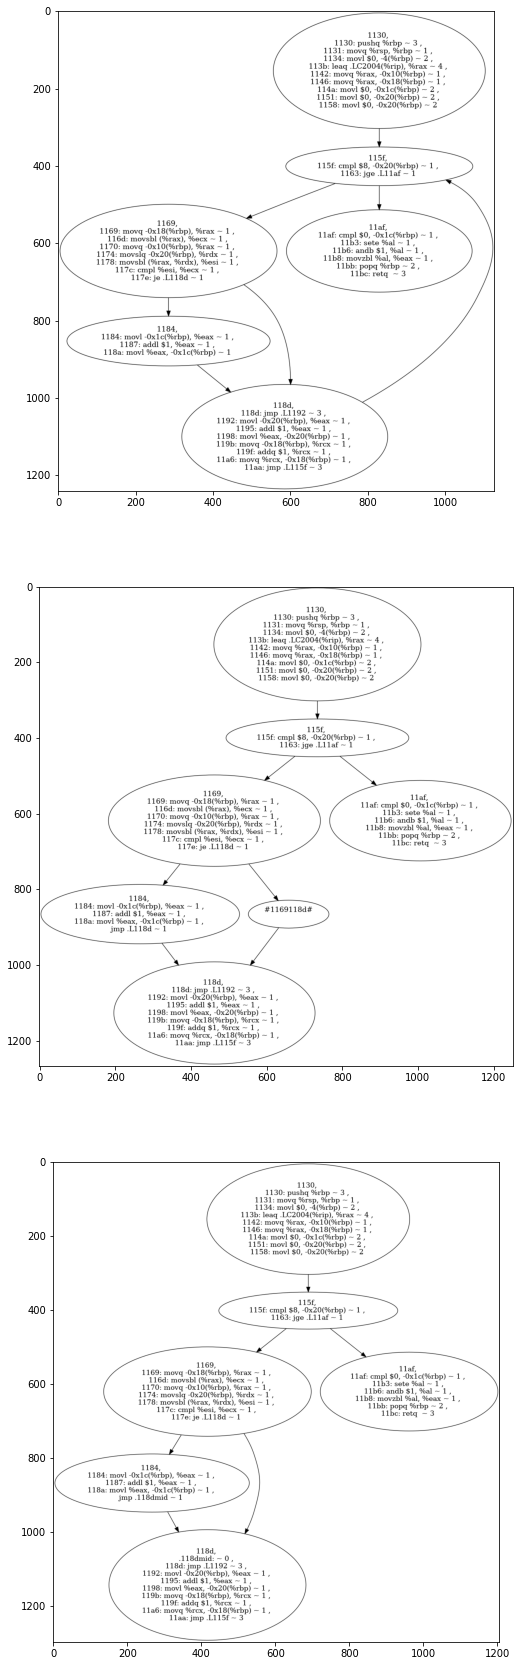

In [4]:

%autoreload 2
from rwtools.nemesis.graph.utils import create_graph_structure
from rwtools.nemesis.graph.utils import to_img
from rwtools.nemesis.graph.balance import balance_branching_point


outputfile = "./test_output.s"
loader, rw = setup(binary, outputfile)
function_names = loader.container.function_names
nodes, graph = create_graph_structure(loader.container, "main")
fig, axs = plt.subplots(3, figsize=(30, 30))

control_flow_graph = ControlFlowGraph(nodes=nodes, graph=graph)

control_flow_graph.merge_consecutive_nodes()
axs[0].imshow(to_img(graph))


control_flow_graph.unwind_graph()


control_flow_graph.insert_nodes()

# control_flow_graph.equalize_branches()

axs[1].imshow(to_img(graph))

# target_node = control_flow_graph.get_node('1169')
# control_flow_graph.set_stopping_nodes(target_node)
control_flow_graph.merge_inserted_nodes()

axs[2].imshow(to_img(graph))

# balance_branching_point(control_flow_graph, target_node)
# control_flow_graph.restore_cycles()
# axs[2].imshow(to_img(graph))


[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


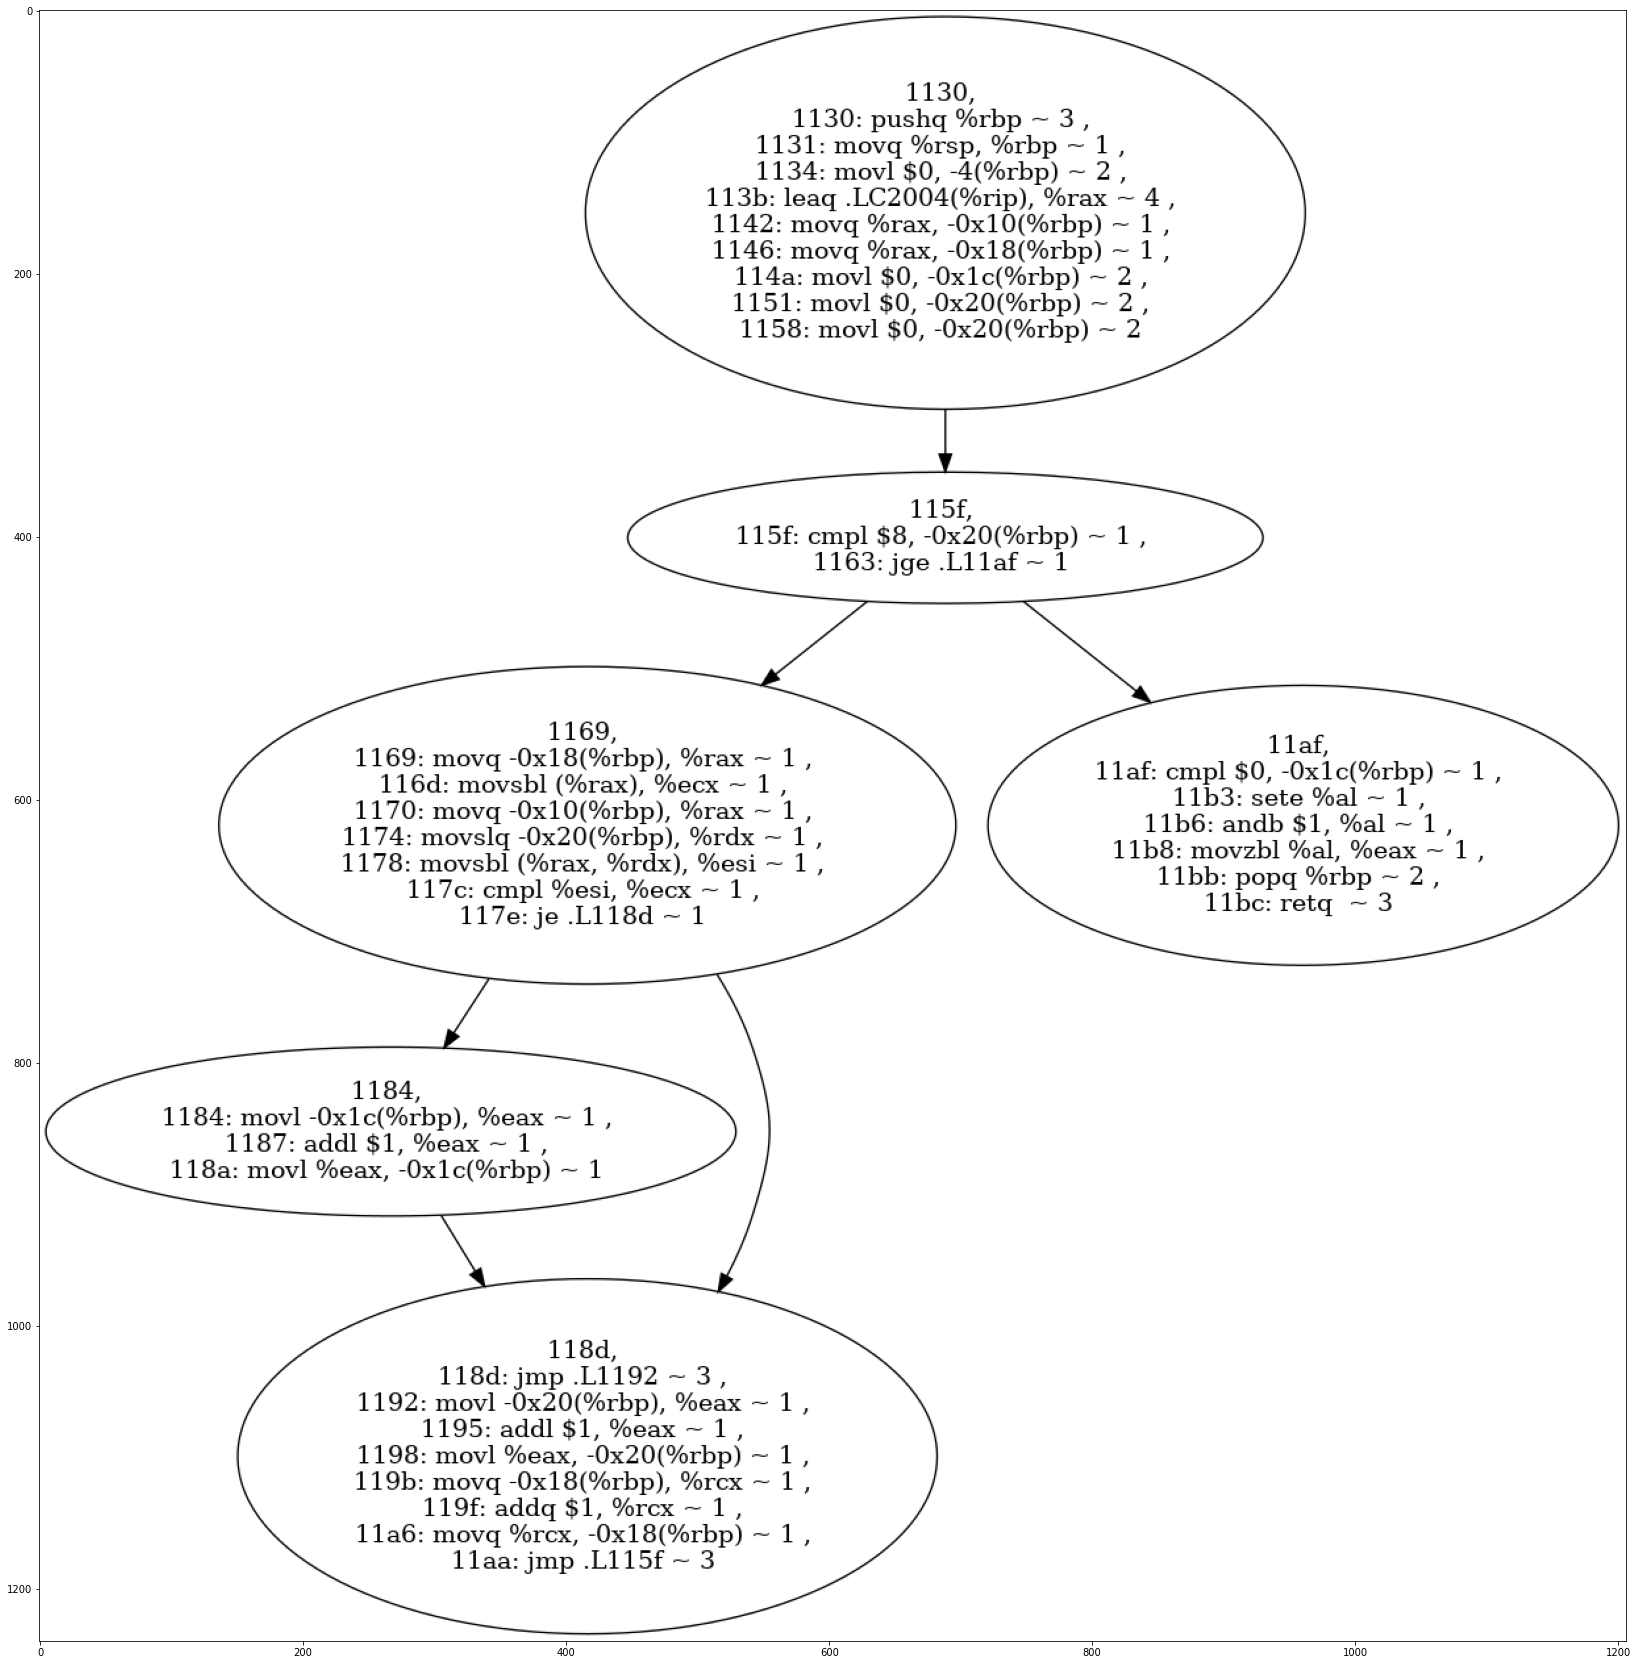

In [5]:

%autoreload 2
from rwtools.nemesis.graph.utils import create_graph_structure
from rwtools.nemesis.graph.utils import to_img
from rwtools.nemesis.graph.balance import balance_branching_point


outputfile = "./test_output.s"
loader, rw = setup(binary, outputfile)
function_names = loader.container.function_names
nodes, graph = create_graph_structure(loader.container, "main")
fig, axs = plt.subplots(1, figsize=(30, 30))

control_flow_graph = ControlFlowGraph(nodes=nodes, graph=graph)

control_flow_graph.merge_consecutive_nodes()

control_flow_graph.unwind_graph()



# control_flow_graph.insert_nodes()
axs.imshow(to_img(graph))

# Solution 
(In this example)   
1. The original starting point of node 118d needs to be marked with a label 
2. node 1184 needs to jmp to this label (instead of to label `L118d`) 
3. The inserted node needs to be prepended to node `118d`



[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


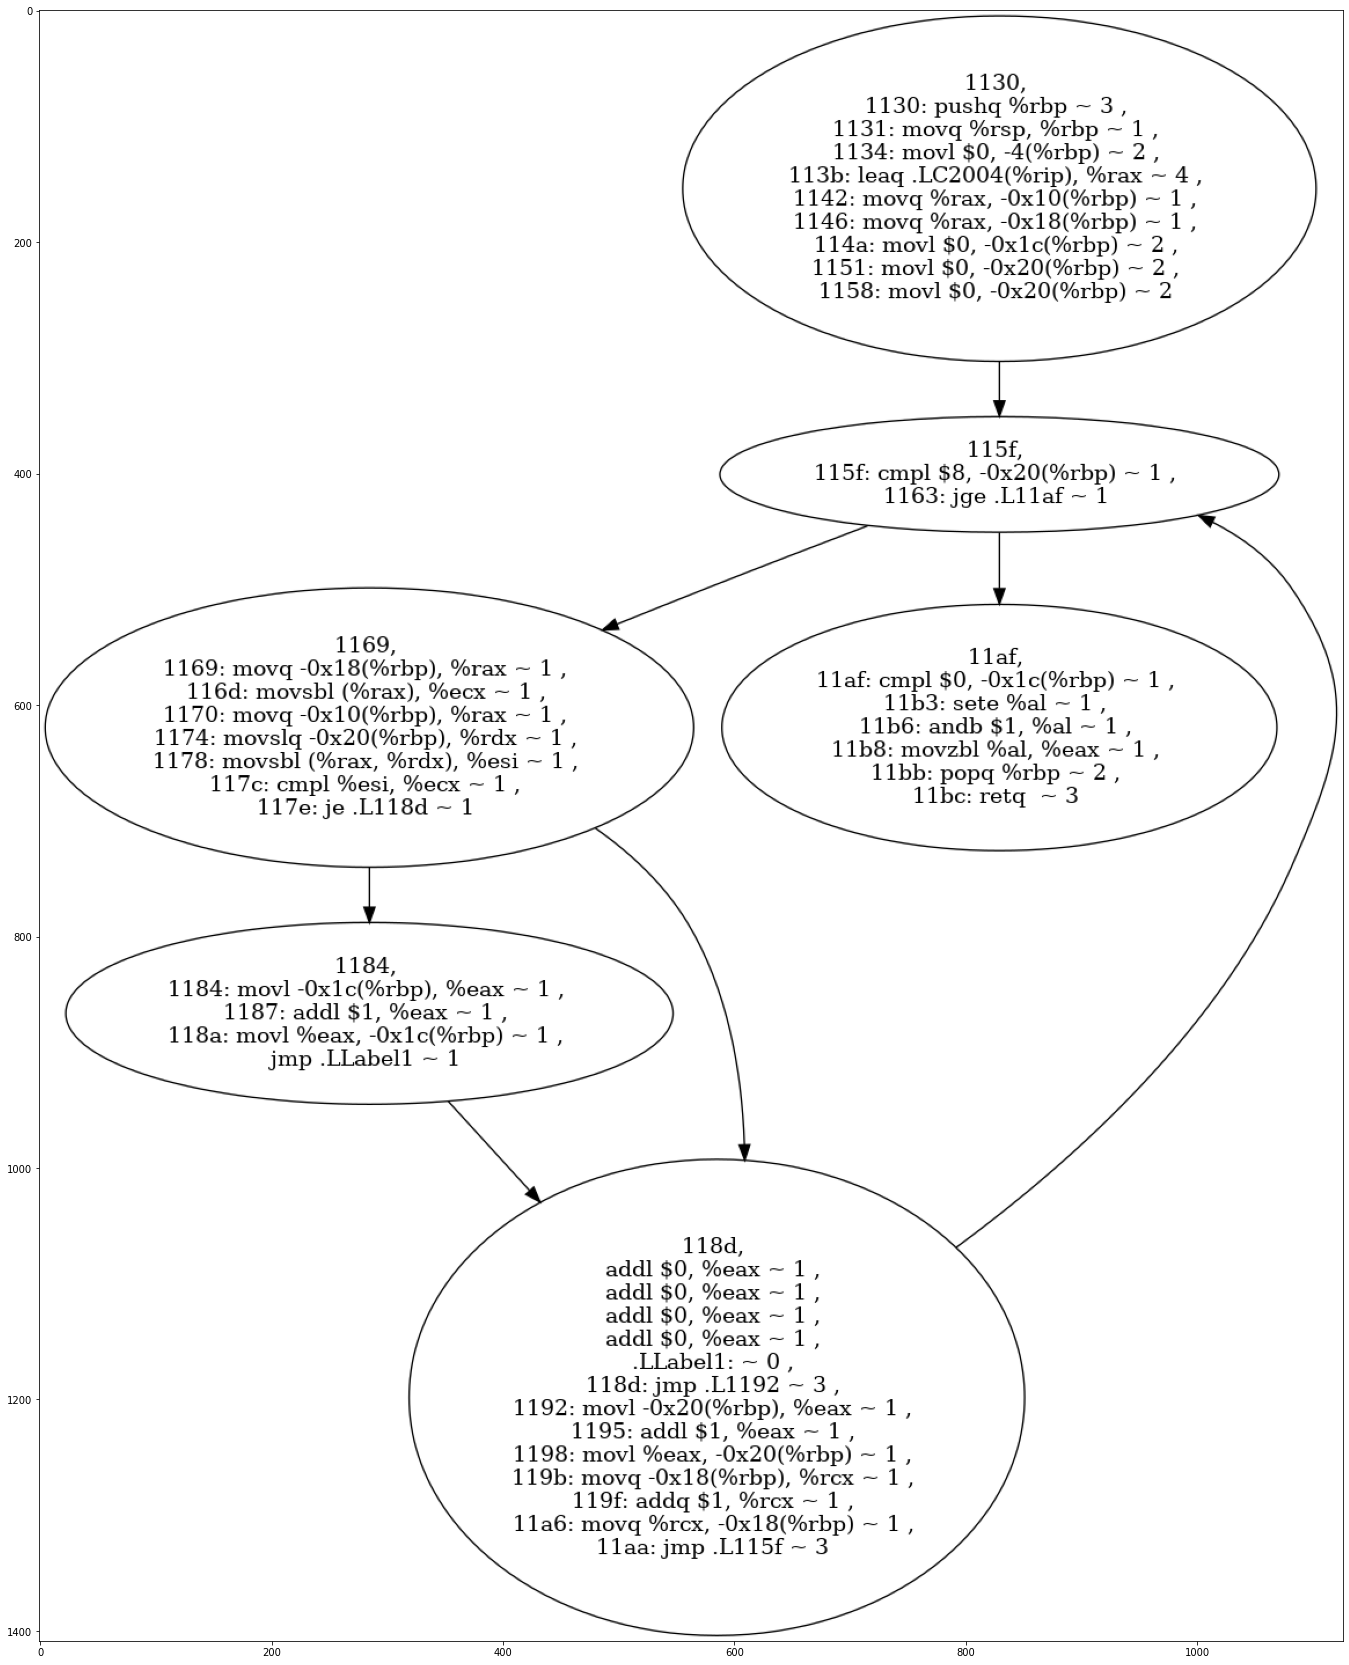

In [6]:

%autoreload 2
from rwtools.nemesis.graph.utils import create_graph_structure
from rwtools.nemesis.graph.utils import to_img
from rwtools.nemesis.graph.balance import balance_branching_point


outputfile = "./test_output.s"
loader, rw = setup(binary, outputfile)
function_names = loader.container.function_names
nodes, graph = create_graph_structure(loader.container, "main")
fig, axs = plt.subplots(1, figsize=(30, 30))

control_flow_graph = ControlFlowGraph(nodes=nodes, graph=graph)

control_flow_graph.merge_consecutive_nodes()

control_flow_graph.unwind_graph()

# insert nodes 
control_flow_graph.insert_nodes()

# balance 
node = control_flow_graph.get_node('1169')
control_flow_graph.set_stopping_nodes(node)
balance_branching_point(control_flow_graph, node)

# set branching labels

node = control_flow_graph.get_node('1184')
to_node = control_flow_graph.get_node('118d')
node.instruction_wrappers[-1].after[0] = f"jmp .LLabel1"

to_node.insert(0, ".LLabel1:", 0)


node = control_flow_graph.get_node('1169118d')
# node.insert(0, "LLabel0:", 0)

# control_flow_graph.get_node('1169').instruction_wrappers[-1].op_str = "LLabel0"

# merge inserted node with its successors & remove inserted node  
target = control_flow_graph.get_node('118d')
source = control_flow_graph.get_node('1169118d')
target.prepend_instructions(source.instructions, source.latencies)

control_flow_graph.graph.add_edge(control_flow_graph.get_node("1169"), control_flow_graph.get_node("118d"))
control_flow_graph.graph.remove_node(source)

# axs.imshow(to_img(graph))

control_flow_graph.restore_cycles()
axs.imshow(to_img(graph))
# axs[1].imshow(to_img(graph))


rw.dump()

# Learned lesson - Optional nodes
**the problem is that in the initial version the intermediate node (the optional node) jumps to the start of the final node**. This is a problem when you insert additional nodes into the other branch.  
THis is because the other branch will later be inseretd at the start of the final node. So what needs to happen is that the optional node branches to the middle of the final node 

Solution: 
1. insert a branching at the end of the optional node to some newly created label 
2. add this label in the final node BEFORE inserted the newly created node into the final node 


[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


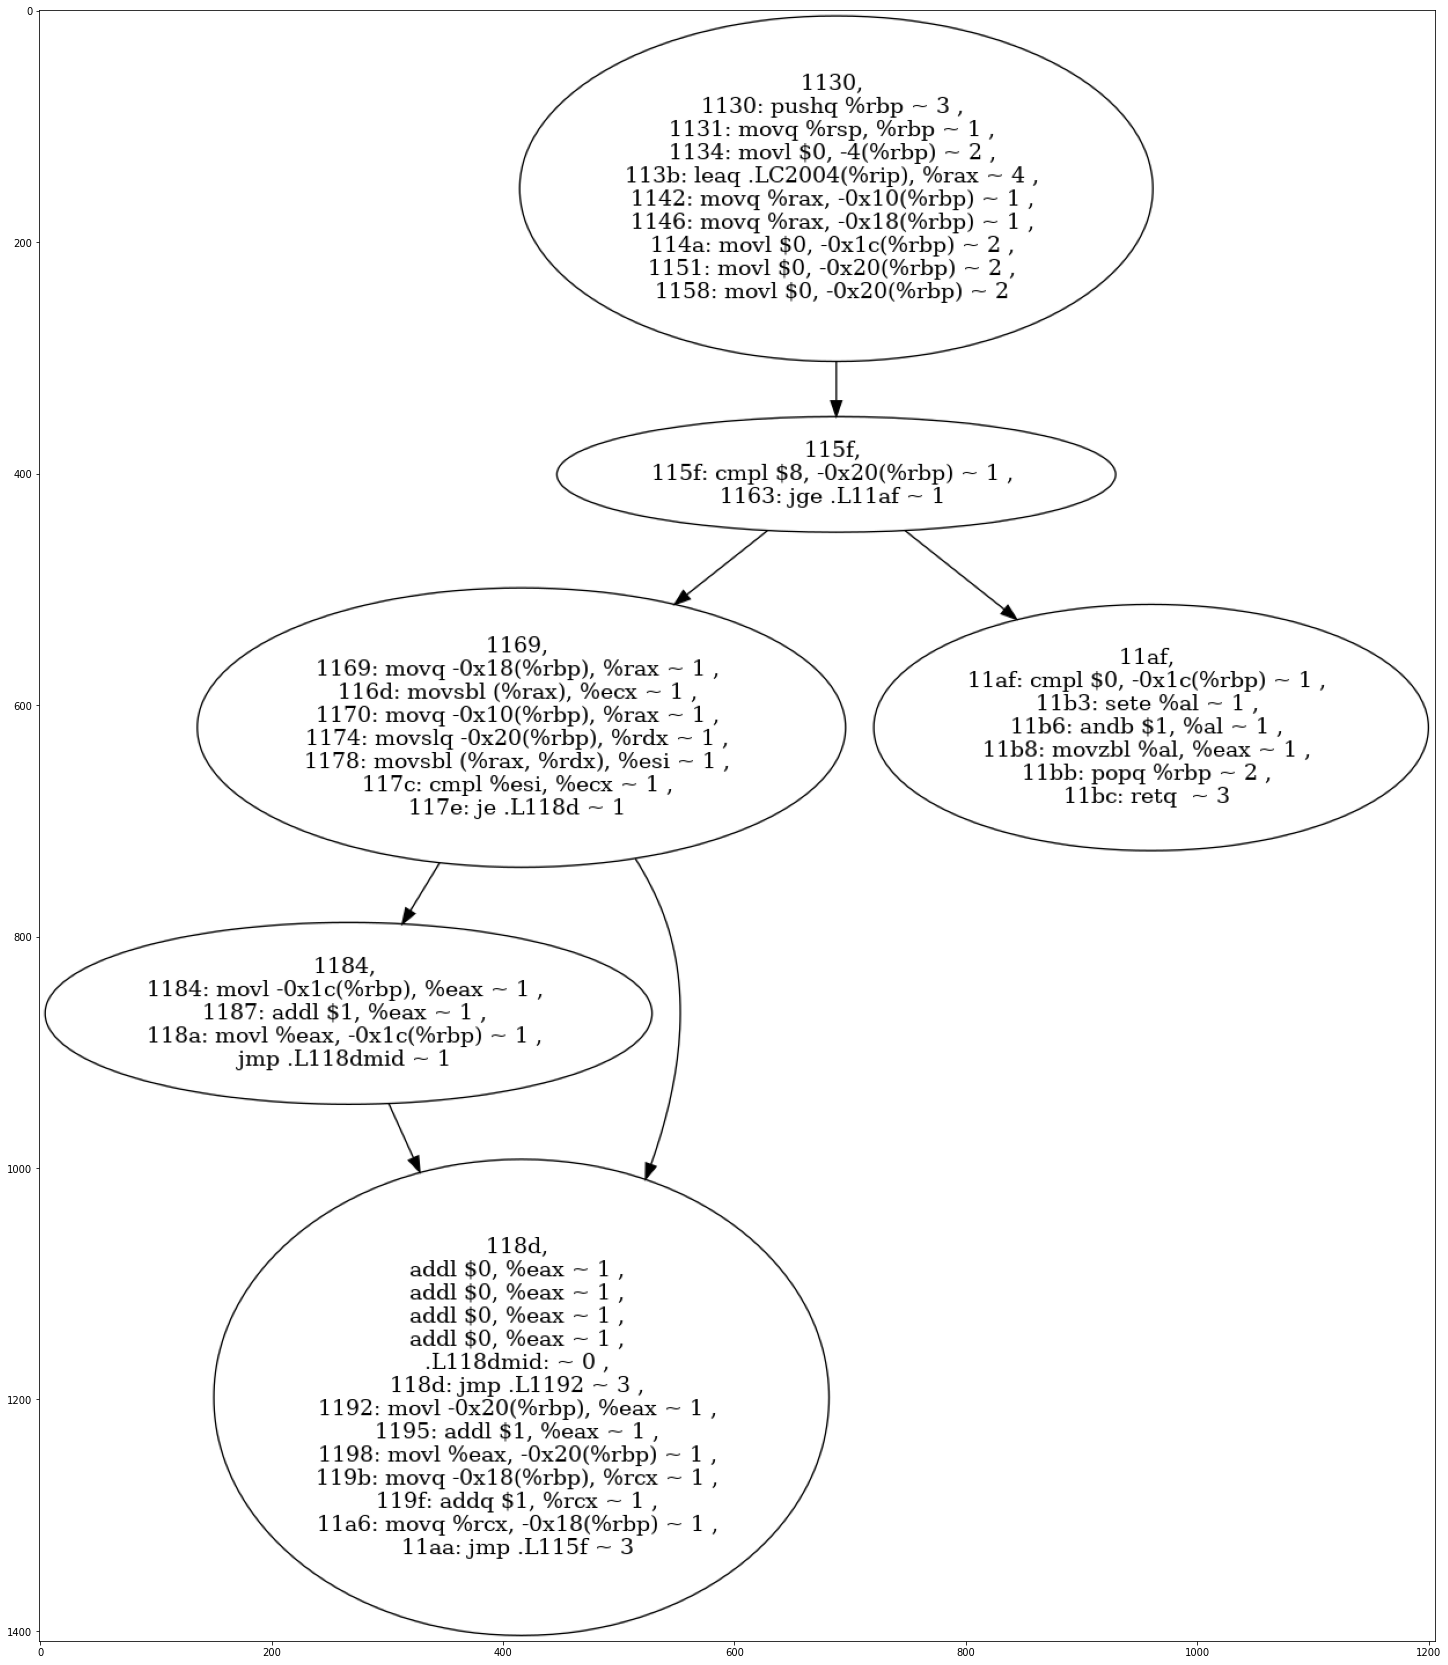

In [10]:

%autoreload 2
from rwtools.nemesis.graph.utils import create_graph_structure
from rwtools.nemesis.graph.utils import to_img
from rwtools.nemesis.graph.balance import balance_branching_point
from rwtools.nemesis.graph.nemesis_node import NemesisNode

outputfile = "./test_output.s"
loader, rw = setup(binary, outputfile)
function_names = loader.container.function_names
nodes, graph = create_graph_structure(loader.container, "main")
fig, axs = plt.subplots(1, figsize=(30, 30))

control_flow_graph = ControlFlowGraph(nodes=nodes, graph=graph)

control_flow_graph.merge_consecutive_nodes()

control_flow_graph.unwind_graph()

# insert nodes 
control_flow_graph.insert_nodes()

# balance 
node = control_flow_graph.get_node('1169')
control_flow_graph.set_stopping_nodes(node)
balance_branching_point(control_flow_graph, node)


    
control_flow_graph.merge_inserted_nodes()
axs.imshow(to_img(graph))

rw.dump()

In [8]:
loader, rw = setup("./a.out", "output.s")
function_names = loader.container.function_names
nodes, graph = create_graph_structure(loader.container, "main")
fig, axs = plt.subplots(1, figsize=(30, 30))

control_flow_graph = ControlFlowGraph(nodes=nodes, graph=graph)

control_flow_graph.merge_consecutive_nodes()
axs.imshow(to_img(graph))


FileNotFoundError: [Errno 2] No such file or directory: './a.out'